**<font color = 'blue' size = 38>NEURAL NETWORKS & DEEP LEARNING</font>**

# <font color = 'Orange'> Classification using Neural Networks</font>

## <font color = 'orange'> Data Preparation</font>
Link: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-08 Neural Networks & Deep Learning/heart.csv')

In [2]:
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

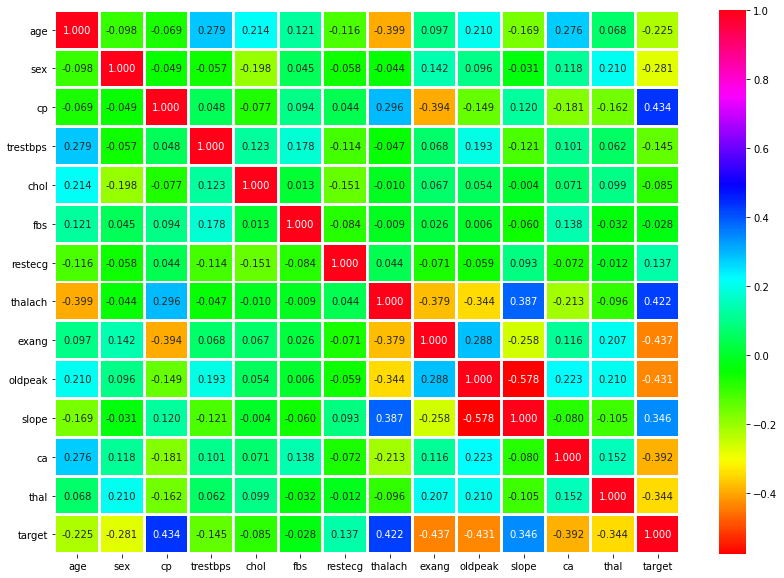

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


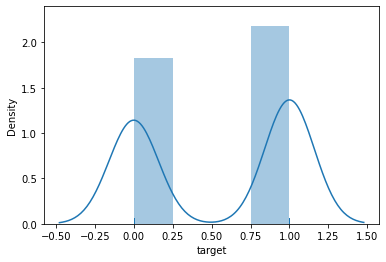

In [5]:
sns.distplot(data['target'],rug=True)
plt.show()

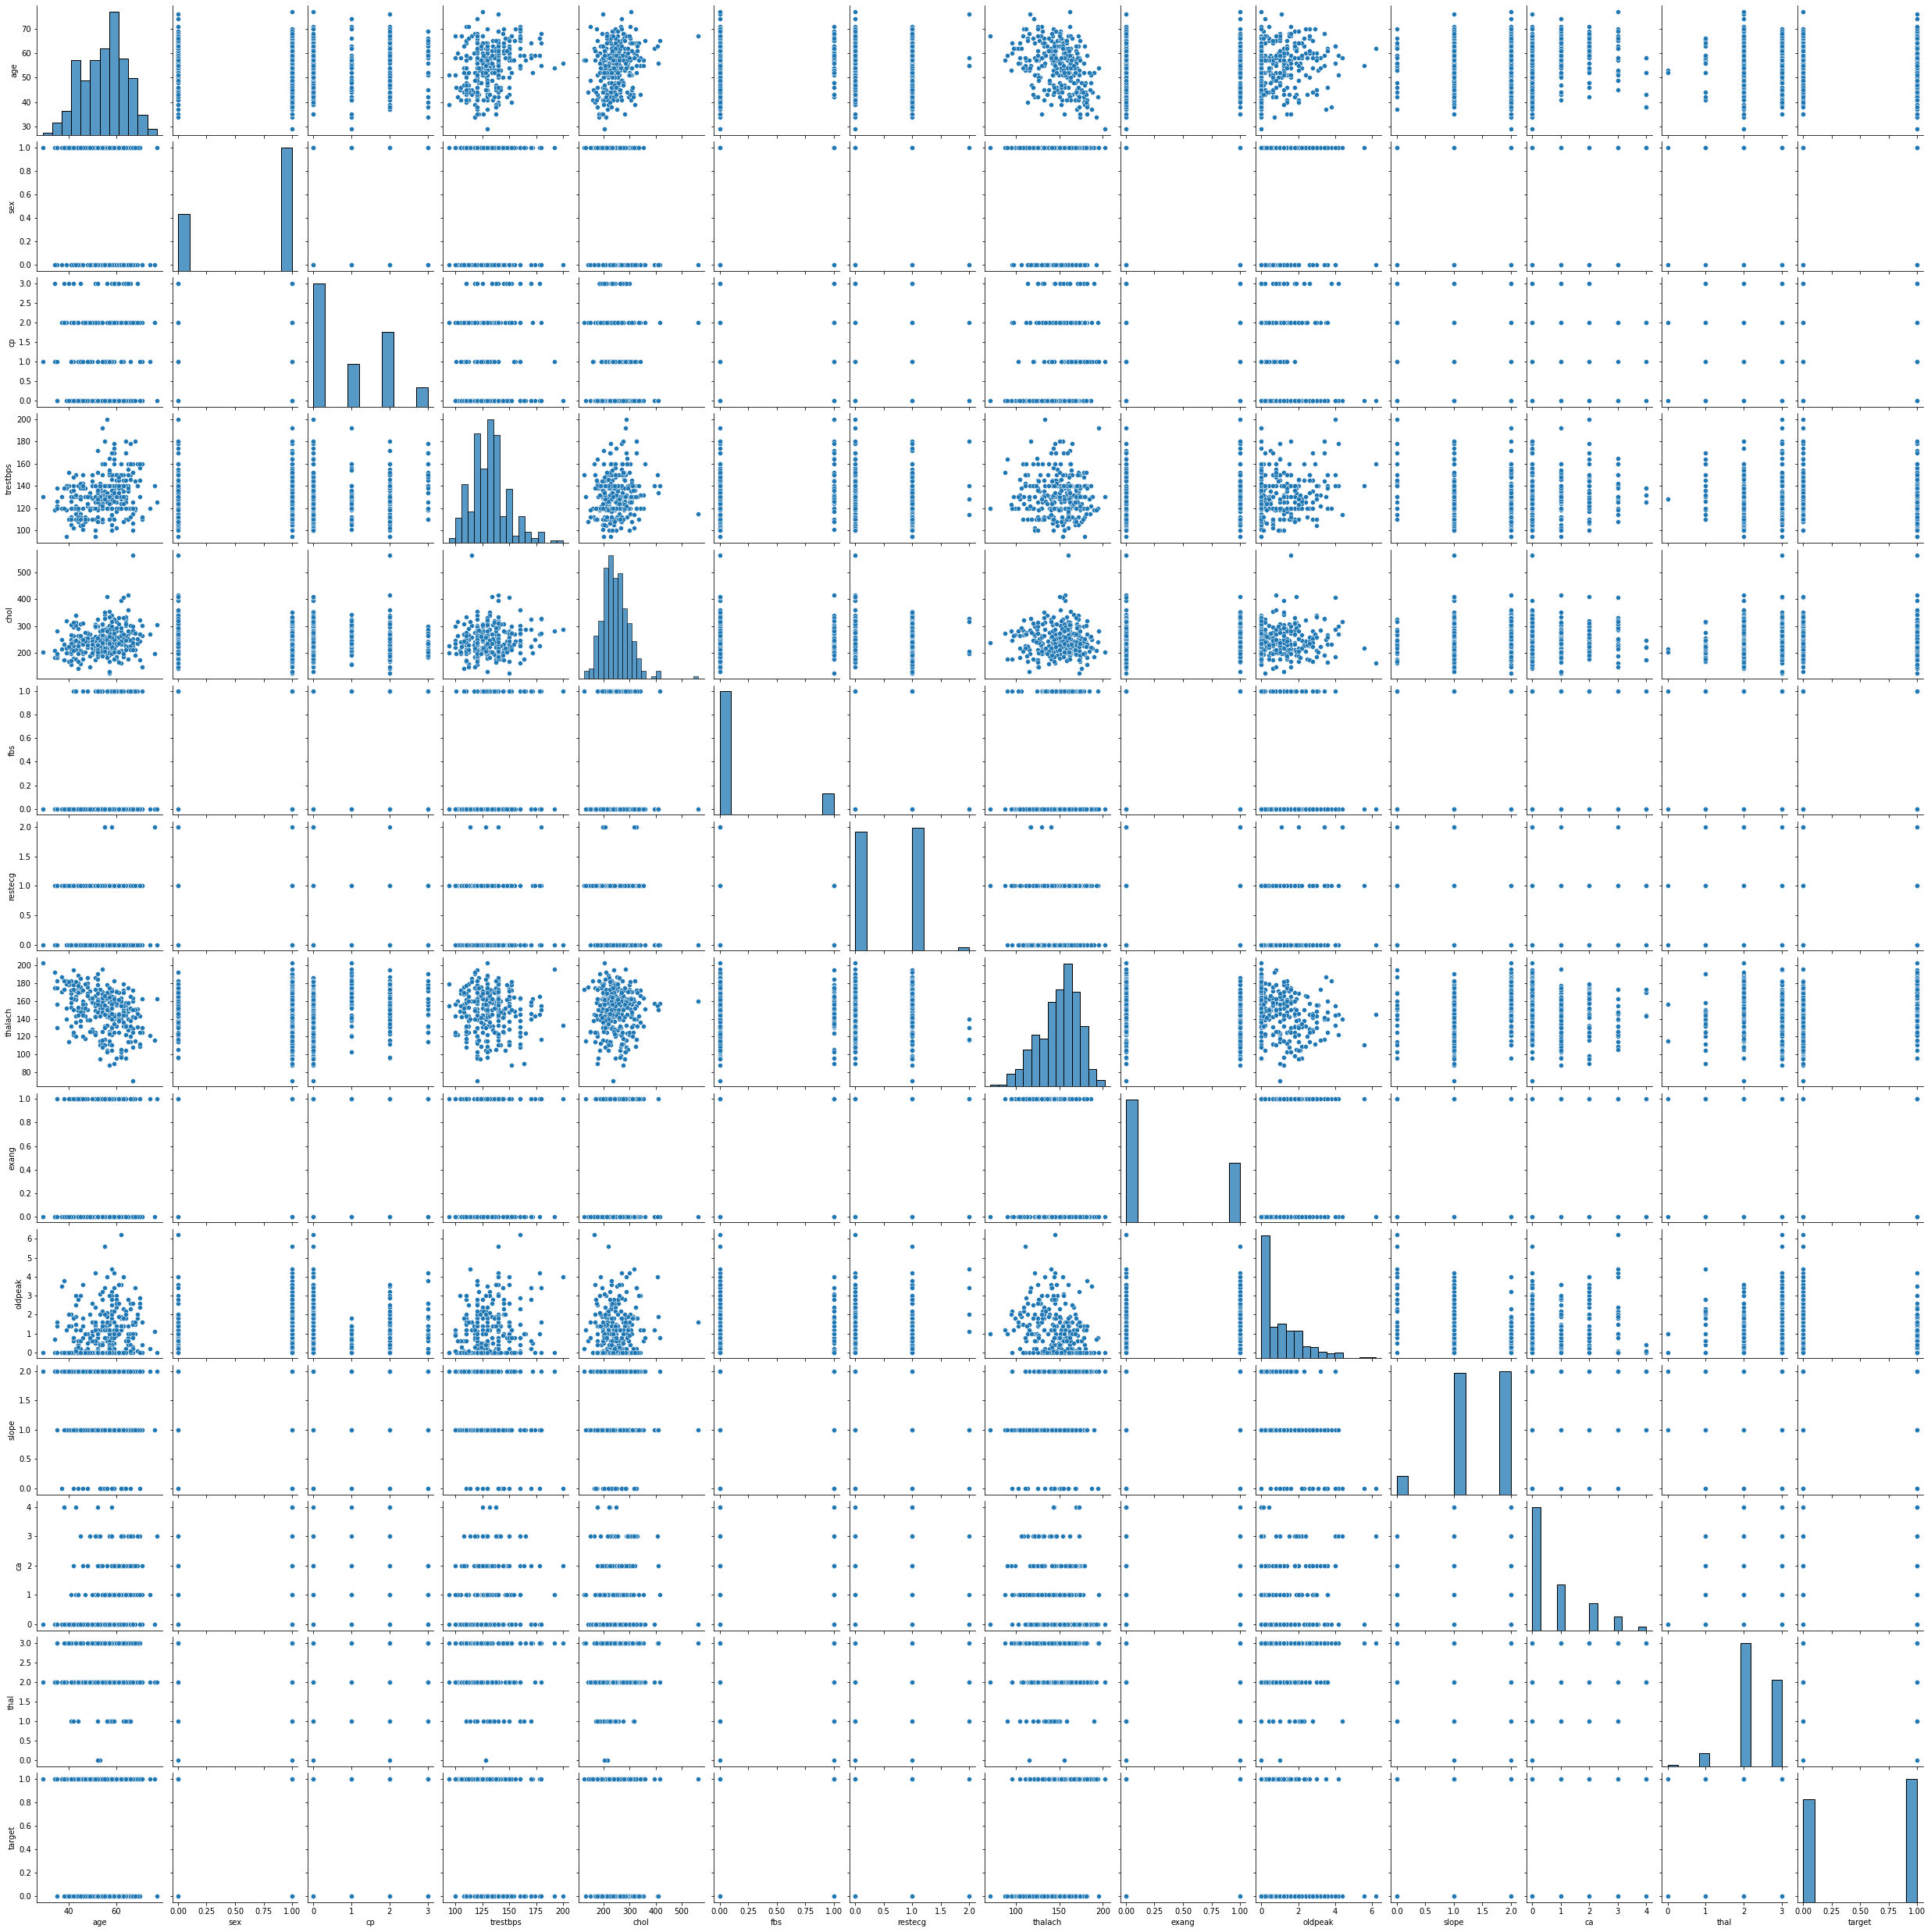

In [6]:
sns.pairplot(data)


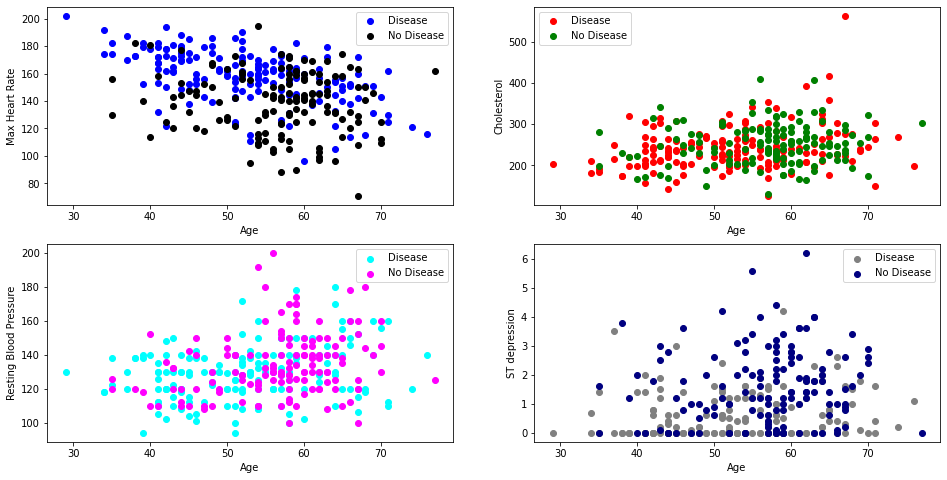

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c='blue')
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=data.age[data.target==1],y=data.chol[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.chol[data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=data.age[data.target==1],y=data.trestbps[data.target==1],c='cyan')
plt.scatter(x=data.age[data.target==0],y=data.trestbps[data.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=data.age[data.target==1],y=data.oldpeak[data.target==1],c='grey')
plt.scatter(x=data.age[data.target==0],y=data.oldpeak[data.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(['target'], axis = 1)
y = data.target.values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <font color = 'Orange'> Classification Model</font>

### <font color = 'Orange'>Define Keras Model</font>

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=13, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))


### <font color = 'Orange'>Compile Keras Model</font>

In [11]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### <font color = 'Orange'>Fit Keras Model</font>

In [12]:
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5331
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5413
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.6157
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.8058
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.8306
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.8512
Epoch 7/150
25/25 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8471
Epoch 8/150
25/25 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8512
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8512
Epoch 10/150
25/25 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8636
Epoch 11/

### <font color = 'Orange'>Evaluate Keras Model</font>

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9876
Accuracy: 98.76


In [14]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [15]:
y_pred

array([[1.03798419e-01],
       [4.20713425e-03],
       [9.15204406e-01],
       [9.00378823e-03],
       [1.08113289e-02],
       [3.70023251e-02],
       [1.01161748e-01],
       [1.81026459e-02],
       [2.57306727e-08],
       [1.29044056e-04],
       [9.97246981e-01],
       [1.00000000e+00],
       [2.85124481e-02],
       [9.99930859e-01],
       [1.00000000e+00],
       [7.18342423e-01],
       [1.32367015e-03],
       [9.99905765e-01],
       [3.21778953e-02],
       [8.67292166e-01],
       [9.99844313e-01],
       [1.24249965e-01],
       [5.06905913e-02],
       [9.02220905e-02],
       [9.93414044e-01],
       [2.18186766e-01],
       [1.31192803e-03],
       [3.02620530e-02],
       [1.00000000e+00],
       [3.88163894e-01],
       [9.99683738e-01],
       [3.87668610e-04],
       [1.00000000e+00],
       [6.38023973e-01],
       [1.00000000e+00],
       [1.89900398e-04],
       [1.26948655e-02],
       [9.98185754e-01],
       [1.54978037e-03],
       [7.70325661e-02],


In [16]:
y_pred = y_pred.round()

accuracy of the model:  0.8688524590163934


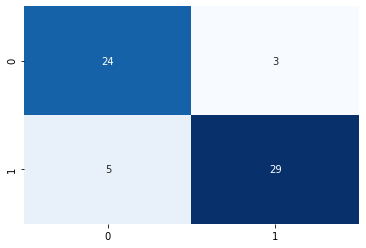

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ',ac)

## <font color = 'Orange'>XGBoost vs Neural Network Classifier</fonT>

In [18]:
from xgboost import XGBClassifier


#inicialize XGBoost
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,n_jobs=-1 , verbose=1,learning_rate=0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

#make prediction
y_pred_xgb = model.predict(X_test)

accuracy of the model:  0.7868852459016393


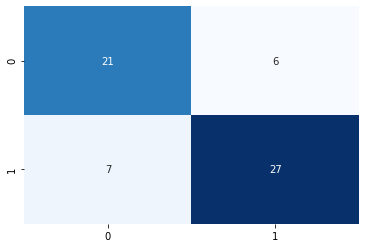

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred_xgb)
print('accuracy of the model: ',ac)

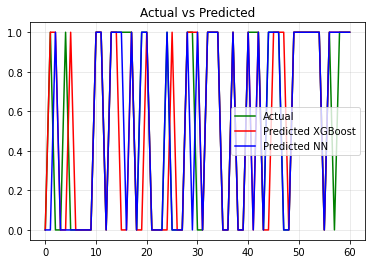

In [20]:
#Visualising the Acutal and predicted Result
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred_xgb, color = 'red', label = 'Predicted XGBoost')
plt.plot(y_pred, color = 'blue', label = 'Predicted NN')

plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# <font color = 'Orange'> Regression using Neural Networks</font>

## <font color='Orange'>First Dataset</font>


### <font color = 'Orange'>Data Preparation</font>
Link:  https://www.kaggle.com/mohansacharya/graduate-admissions

In [24]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-08 Neural Networks & Deep Learning/Admission_Predict.csv')

In [25]:
data.head()

Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0           1        337          118  ...  9.65         1              0.92
1           2        324          107  ...  8.87         1              0.76
2           3        316          104  ...  8.00         1              0.72
3           4        322          110  ...  8.67         1              0.80
4           5        314          103  ...  8.21         0              0.65

[5 rows x 9 columns]

In [26]:
data=data.drop('Serial No.',axis=1)


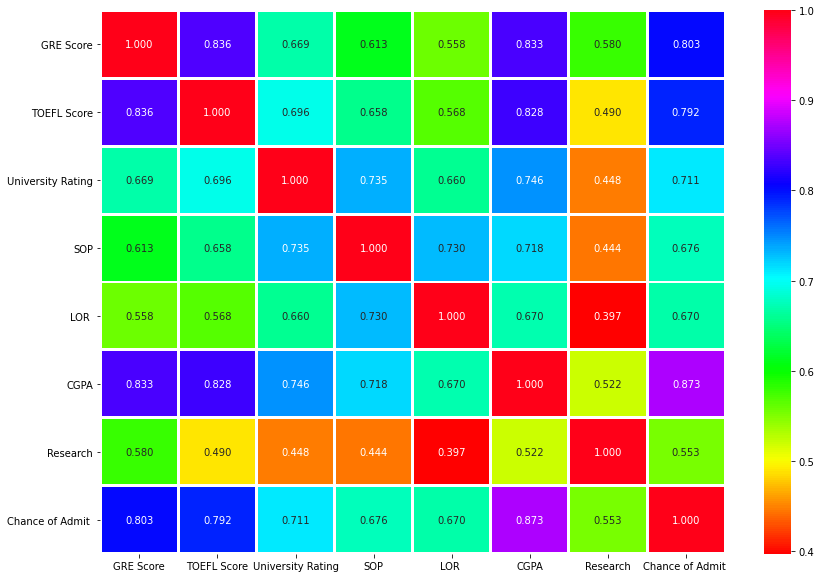

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [30]:
import numpy as np

X=np.asarray(data.drop('Chance of Admit ',axis=1))
Y=np.asarray(data['Chance of Admit '])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <font color = 'Orange'> Regression Model</font>

#### <font color = 'Orange'>Define Keras Model</font>

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
    


model.add(Dense(16, input_dim=7, activation='relu'))

model.add(Dropout(0.2, input_shape=(16,)))

model.add(Dense(8, activation='relu'))

model.add(Dropout(0.2, input_shape=(8,)))

model.add(Dense(1, activation='linear'))

#### <font color = 'Orange'>Compile Keras Model</font>

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam')

#### <font color = 'Orange'>Fit Keras Model</font>

In [35]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=10,  verbose=1, validation_split=0.2)


Epoch 1/30
26/26 [==============================] - 0s 5ms/step - loss: 0.7061 - val_loss: 0.4065
Epoch 2/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3802 - val_loss: 0.1669
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2643 - val_loss: 0.0987
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2488 - val_loss: 0.0823
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2447 - val_loss: 0.0658
Epoch 6/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2134 - val_loss: 0.0587
Epoch 7/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1789 - val_loss: 0.0464
Epoch 8/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1578 - val_loss: 0.0453
Epoch 9/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.0417
Epoch 10/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1273 - val_loss: 0.0385
Epoch 11/30
26/26 [

#### <font color = 'Orange'>Evaluate Keras Model</font>

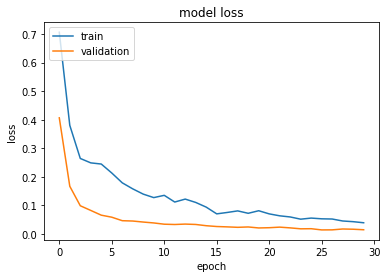

In [36]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
y_pred = model.predict(X_test)

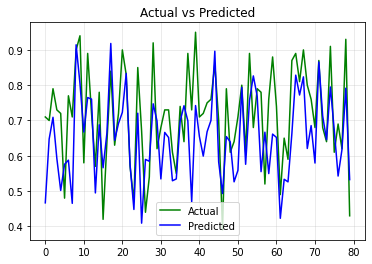

In [39]:
#Visualising the Acutal and predicted Result
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.16473942076365677


## <font color='Orange'>Second Dataset</font>

*From Exercise 5 (advanced part)

### <font color = 'Orange'>Data Preparation</font>
Link:  https://www.kaggle.com/c/lish-moa/data

In [62]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-05 Introduction to ML/train_data.csv')

In [63]:
X_train = train.iloc[:,1:-206]
Y_train = train.iloc[:,-206 :-1]

In [64]:
train.shape

(23814, 1082)

In [65]:
train

sig_id  cp_type  ...  vitamin_d_receptor_agonist  wnt_inhibitor
0      id_000644bb2        1  ...                           0              0
1      id_000779bfc        1  ...                           0              0
2      id_000a6266a        1  ...                           0              0
3      id_0015fd391        1  ...                           0              0
4      id_001626bd3        1  ...                           0              0
...             ...      ...  ...                         ...            ...
23809  id_fffb1ceed        1  ...                           0              0
23810  id_fffb70c0c        1  ...                           0              0
23811  id_fffc1c3f4        0  ...                           0              0
23812  id_fffcb9e7c        1  ...                           0              0
23813  id_ffffdd77b        1  ...                           0              0

[23814 rows x 1082 columns]

In [66]:
test = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-05 Introduction to ML/test_data.csv')

In [67]:
test.shape

(3982, 1082)

In [68]:
test


sig_id  cp_type  ...  vitamin_d_receptor_agonist  wnt_inhibitor
0     id_0004d9e33        1  ...                         0.5            0.5
1     id_001897cda        1  ...                         0.5            0.5
2     id_002429b5b        0  ...                         0.5            0.5
3     id_00276f245        1  ...                         0.5            0.5
4     id_0027f1083        1  ...                         0.5            0.5
...            ...      ...  ...                         ...            ...
3977  id_ff7004b87        1  ...                         0.5            0.5
3978  id_ff925dd0d        1  ...                         0.5            0.5
3979  id_ffb710450        1  ...                         0.5            0.5
3980  id_ffbb869f2        1  ...                         0.5            0.5
3981  id_ffd5800b6        1  ...                         0.5            0.5

[3982 rows x 1082 columns]

In [69]:
X_test = test.iloc[:,1:-206]
Y_test = test.iloc[:,-206 :-1]

In [70]:
X_train.shape

(23814, 875)

In [71]:
Y_train.shape

(23814, 205)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <font color = 'Orange'> Regression Model</font>

#### <font color = 'Orange'>Define Keras Model</font>

In [73]:
model = Sequential()
model.add(Dense(216, input_dim=875, kernel_initializer='normal', activation='relu'))
model.add(Dense(512,kernel_initializer = 'normal', activation='relu'))
model.add(Dense(216, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(205, activation='linear'))
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 216)               189216    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               111104    
_________________________________________________________________
dense_13 (Dense)             (None, 216)               110808    
_________________________________________________________________
dense_14 (Dense)             (None, 205)               44485     
Total params: 455,613
Trainable params: 455,613
Non-trainable params: 0
_________________________________________________________________


#### <font color = 'Orange'>Compile Keras Model</font>

In [74]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


#### <font color = 'Orange'>Fit Keras Model</font>

In [75]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=50,  verbose=1, validation_split=0.2)


Epoch 1/15
382/382 [==============================] - 3s 8ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0091 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0069
Epoch 2/15
382/382 [==============================] - 3s 7ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0068 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0069
Epoch 3/15
382/382 [==============================] - 3s 7ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0069 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0069
Epoch 4/15
382/382 [==============================] - 3s 7ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0069 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0068
Epoch 5/15
382/382 [==============================] - 3s 7ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0069 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0069
Epoch 6/15
382/382 [==============================] - 3s 7ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0069 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0072
Epoch 7/15
382/3

#### <font color = 'Orange'>Evaluate Keras Model</font>

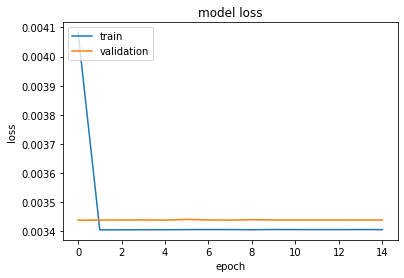

In [76]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
y_pred = model.predict(X_test)

In [81]:
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test.round(), y_pred.round())
print('accuracy of the model: ',ac)

accuracy of the model:  1.0
